In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
housing=pd.read_csv('../Data/State_MedianListingPrice_AllHomes.csv')
housing.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,California,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,475000.0,479900,479950.0,475000.0,475000.0,475000.0,470000.0,460000.0,460900.0,473900.0
1,Texas,2,158700.0,159900.0,159965.0,162500.0,162900.0,164500.0,160000.0,161475.0,...,254173.0,255000,255000.0,254178.0,250000.0,255000.0,250000.0,249900.0,249900.0,254100.0
2,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,349000.0,349000,329900.0,327900.0,329000.0,329000.0,338500.0,336900.0,349000.0,350000.0
3,Florida,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,256000.0,258000,258114.5,254900.0,259000.0,259900.0,260000.0,263000.0,269500.0,272900.0
4,Illinois,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,209500.0,209000,202990.0,199000.0,199000.0,195000.0,189900.0,184900.0,184400.0,194900.0


In [83]:
san=housing
columns_to_keep=['2014','2015','2016']
columnss=[col for col in housing.columns[5:] if col[:4] in columns_to_keep]
san_pivot=pd.melt(san,id_vars=['RegionName'],value_vars=columnss,var_name='Date',value_name='Median_Price')
san_pivot['Month']=san_pivot['Date'].apply(lambda x:x[-2:])
san_pivot['Date']=san_pivot['Date'].apply(lambda x:x[:-3])
san_pivot=san_pivot[['RegionName','Date','Month','Median_Price']]
san_pivot[san_pivot.RegionName =='Massachusetts']
san_pivot.head()

,RegionName,Date,Month,Median_Price
0,California,2014,01,380000.0
1,Texas,2014,01,191641.0
2,New York,2014,01,310000.0
3,Florida,2014,01,199900.0
4,Illinois,2014,01,155000.0


In [84]:
san_pivot=san_pivot.groupby(['RegionName','Date','Month']).mean()
san_pivot.head()

Median_Price
RegionName Date Month              
Alabama    2014 01         159900.0
                02         164900.0
                03         168900.0
                04         169900.0
                05         169900.0

In [85]:
san_pivot=san_pivot.unstack(['Date','RegionName'])
san_pivot.columns.names=['Median','Date','RegionName']
san_pivot.head()

Median     Median_Price                                                    \
Date               2014      2015      2016      2014      2015      2016   
RegionName      Alabama   Alabama   Alabama    Alaska    Alaska    Alaska   
Month                                                                       
01             159900.0  168500.0  169900.0  239000.0  247500.0  265000.0   
02             164900.0  169900.0  169000.0  247000.0  249900.0  272500.0   
03             168900.0  169900.0  169900.0  249000.0  259000.0  275000.0   
04             169900.0  174900.0  175000.0  250000.0  259900.0  279900.0   
05             169900.0  173700.0  175000.0  250000.0  260000.0  279900.0   

Median                                              ...             \
Date            2014      2015      2016      2014  ...       2016   
RegionName   Arizona   Arizona   Arizona  Arkansas  ... Washington   
Month                                               ...              
01          215000.0  228900.0  249500.0  139800.0  ...   281900.0   
02          219000.0  234000.0  249000.0  139900.0  ...   284900.0   
03          222500.0  238000.0  249900.0  140000.0  ...   289000.0   
04          225000.0  240000.0  253500.0  142500.0  ...   299000.0   
05          229000.0  245000.0  255000.0  144000.0  ...   300000.0   

Median                                                                    \
Date                2014          2015          2016      2014      2015   
RegionName West Virginia West Virginia West Virginia Wisconsin Wisconsin   
Month                                                                      
01              139900.0      149000.0      149900.0  149900.0  157500.0   
02              139900.0      149200.0      149900.0  149900.0  159900.0   
03              145000.0      149900.0      150000.0  154800.0  160000.0   
04              149900.0      150000.0      155000.0  159000.0  164900.0   
05              149900.0      154900.0      159000.0  159900.0  169900.0   

Median                                              
Date            2016      2014      2015      2016  
RegionName Wisconsin   Wyoming   Wyoming   Wyoming  
Month                                               
01          164900.0  218000.0  235000.0  233000.0  
02          164900.0  224900.0  232500.0  234900.0  
03          169000.0  224900.0  230950.0  235000.0  
04          170000.0  225000.0  229900.0  235200.0  
05          176990.0  229500.0  234700.0  239000.0  

[5 rows x 150 columns]

In [86]:
san_pivot=san_pivot.groupby(level=['Median','Date','RegionName'],axis=1).mean()
san_pivot['Median_Price']['2014']['California']


Month
01    380000.0
02    389999.0
03    399000.0
04    417000.0
05    419900.0
06    425000.0
07    425000.0
08    424500.0
09    418000.0
10    410000.0
11    399746.0
12    379900.0
Name: California, dtype: float64

In [92]:
lista=['New York','California']
def plottinga(year,xi):
    a=san_pivot['Median_Price'][year][xi]
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(san_pivot.index, san_pivot['Median_Price'][year][xi],color='red' ,label = 'Median price')

    ax.set_title('Median Price Vs Mortgage of {} in {}'.format(xi,year))
    sns.set_style("whitegrid", {'axes.grid' : False})
    ax2=ax.twinx()
    ax2.plot(mortgage1.index, mortgage1['MT'][year] ,color='green',label = 'Mortgage')
    
    ax.set_xlim(1,)
    ax.legend(loc=1)
    ax2.legend(loc=2)
    ax.set_xlabel('Month')
    ax.set_ylabel('Median Price by {}'.format(year))
    ax2.set_ylabel('Mortgage % Rate')

In [88]:
mortgage= pd.read_csv('../Data/MORTGAGE30US_2000_2017.csv')
mortgage.head()

,DATE,MORTGAGE30US
0,2000-01-07,8.15
1,2000-01-14,8.18
2,2000-01-21,8.26
3,2000-01-28,8.25
4,2000-02-04,8.25


In [89]:
mortgage= pd.read_csv('../Data/MORTGAGE30US_2000_2017.csv')
mortgage['YEAR']=mortgage['DATE'].apply(lambda x:x[:4])
mortgage['MONTH']=mortgage['DATE'].apply(lambda x:x[5:7])

# Renaming column MORTGAGE
mortgage.rename(columns={'MORTGAGE30US':'MT'},inplace=True)

mortgage=mortgage.groupby(['YEAR','MONTH']).agg({'MT':np.mean})

mortgage.head()

MT
YEAR MONTH        
2000 01     8.2100
     02     8.3250
     03     8.2400
     04     8.1525
     05     8.5150

In [90]:
mortgage1=mortgage.unstack('YEAR')
mortgage1.columns.names=['MORTGAGE','YEAR']
mortgage1.xs('2010',axis=1,level='YEAR')
mortgage1=mortgage1.loc[:, (slice(None), slice('2010','2016'))]
mortgage1.head()
mortgage1.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='MONTH')

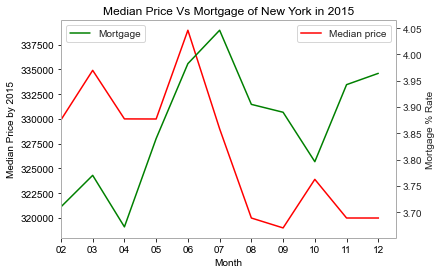

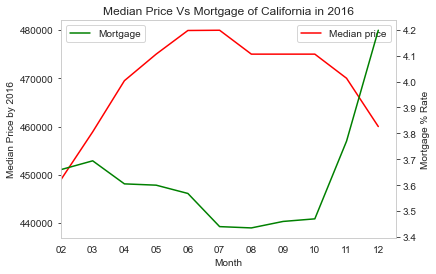

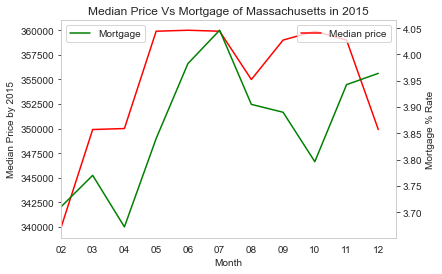

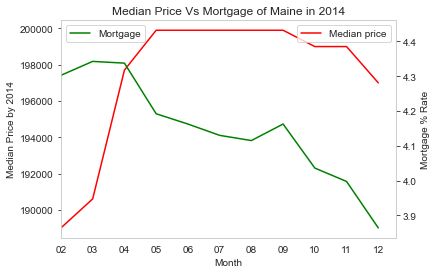

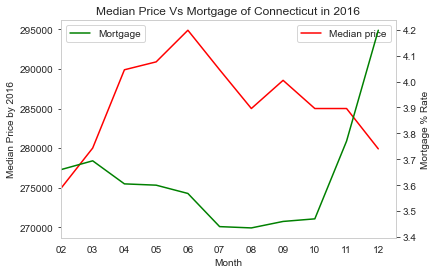

In [93]:
plottinga('2015','New York')
# pylab.savefig('Analysis2/Analysis2_New_York.png')
plottinga('2016','California')
# pylab.savefig('Analysis2/Analysis2_California.png')
plottinga('2015','Massachusetts')
# pylab.savefig('Analysis2/Analysis2_Massachusetts.png')
plottinga('2014','Maine')
# pylab.savefig('Analysis2/Analysis2_Maine.png')
plottinga('2016',"Connecticut")
# pylab.savefig('Analysis2/Analysis2_Connecticut.png')